# Construct Dataset

In [1]:
import pycbc.noise
import pycbc.psd
import pycbc.filter
import pylab
from pycbc.filter import sigma
from pycbc.waveform import get_td_waveform
from pycbc.types.timeseries import load_timeseries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.random import uniform, randint
from tqdm import tqdm
import seaborn as sns
from sklearn.model_selection import train_test_split

#import data functions
from ipynb.fs.full.data_functions import gw, visualize, bol

PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


Trial 1 for regression! 
- no noise added pure signal. 
- signals fully contained in windows of 1 second
- masses randomly generated (ranges for masses shown below)
    - unlike later trials of classifier, here we will make sure the whole waveform around 0.8 second length
- train and test generated in one batch. Then separate.

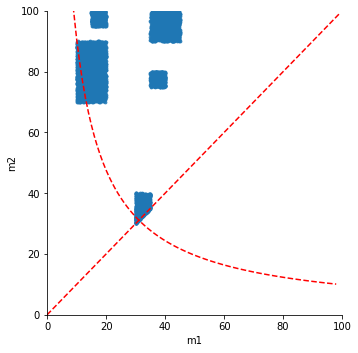

In [2]:
# Randomly generate masses IN ASCENDING ORDER
# Training masses 
mass = []
for i in np.arange(2000):  
    pair = [uniform(10,20),uniform(70,90)]
    pair.sort()
    mass.append(pair)
    
for i in np.arange(500):  
    pair = [uniform(15,20),uniform(95,100)]
    pair.sort()
    mass.append(pair)

for i in np.arange(800):  
    pair = [uniform(30,35),uniform(30,40)]
    pair.sort()
    mass.append(pair)
           
for i in np.arange(500):  
    pair = [uniform(75,80),uniform(35,40)]
    pair.sort()
    mass.append(pair)   
    
for i in np.arange(1000):  
    pair = [uniform(35,45),uniform(90,100)]
    pair.sort()
    mass.append(pair)   

mass = pd.DataFrame(mass)
mass.columns = ['m1','m2']

# Create scatterplot of dataframe
sns.lmplot('m1', 'm2', data=mass, fit_reg=False, 
           scatter_kws={"s": 8})
plt.ylim(0,100)
plt.xlim(0,100)

plt.plot(np.arange(100),'r--')
plt.plot(1000/np.arange(1,100),'r--')
plt.show()

Unexpected finding: for length to be less than around 0.8, we have the range of masses constrained by the above 2 functions!

In [3]:
# target: [m1,m2] where m1 <= m2
# note that only need to append X, y is basically mass dataframe
def appendX(wave):
    wave.save('temporary2.txt')
    wave = np.loadtxt('temporary2.txt',usecols=1)
    X.append(wave)

In [4]:
# Generate data of pure gw (snr = \infty) 
X = []
y = mass

for i in tqdm(range(len(mass))):
    gww = gw(mass.loc[i,'m1'], mass.loc[i,'m2'])
    appendX(gww)

100%|██████████| 4800/4800 [08:20<00:00,  4.49it/s]


In [5]:
# Save as dataframe
X_df = pd.DataFrame(X)

In [6]:
# Since sklearn makes things a lot easier, can just store the whole data and split every time. 
# If want to recreate the split just use same random seed

# '''ALREADY DONE NO NEED REPEAT
f_path = 'regression_training/stage1B/X.txt'
X_df.to_csv(f_path)
f_path = 'regression_training/stage1B/y.txt'
y.to_csv(f_path) 
#'''

In [7]:
# statistic information
print("Number of data: ",len(X))

Number of data:  4800
